In [2]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [3]:
def gen(arr,step,n):
    res=[]
    for i in arr:
        res.append([x for x in [i+j*step for j in range(-n,n+1)]])
    return res

arr = [1,1,1,1,1,1,1,1,1]
ret = (gen(arr, 0.01,2))
y = []
for i in range(5):
    x = []
    for j in range(9):
        x.append(float("{:.2f}".format(ret[j][i])))
    y.append(x)

for x in y:
    print(x, end=',\n')


[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98],
[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01, 1.01],
[1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02],


In [176]:

x_train = [
    
[0.67, 0.95, 0.93, 0.91, 1.00, 0.94, 0.93, 0.87, 0.69],
[0.67, 0.95, 0.92, 0.90, 1.00, 0.94, 0.92, 0.87, 0.67],
[0.66, 0.95, 0.92, 0.90, 1.00, 0.94, 0.92, 0.87, 0.66],
[0.66, 0.95, 0.92, 0.90, 1.00, 0.94, 0.92, 0.87, 0.66],
[0.66, 0.95, 0.92, 0.90, 1.00, 0.94, 0.92, 0.87, 0.67],
[0.66, 0.95, 0.93, 0.91, 1.00, 0.94, 0.92, 0.87, 0.74],
[0.67, 0.95, 0.93, 0.92, 1.00, 0.94, 0.92, 0.87, 0.82],
[0.68, 0.95, 0.93, 0.92, 1.00, 0.94, 0.92, 0.87, 0.83],
[0.68, 0.95, 0.93, 0.92, 1.00, 0.94, 0.92, 0.87, 0.82],
[0.68, 0.95, 0.93, 0.92, 1.00, 0.94, 0.92, 0.87, 0.81],

    
[0.00, 0.23, 0.00, 0.48, 0.53, 0.60, 0.44, 0.33, 0.17],
[0.00, 0.18, 0.00, 0.46, 0.53, 0.59, 0.40, 0.32, 0.18],
[0.00, 0.15, 0.00, 0.42, 0.52, 0.54, 0.36, 0.29, 0.18],
[0.03, 0.16, 0.00, 0.29, 0.51, 0.45, 0.28, 0.23, 0.15],
[0.05, 0.21, 0.00, 0.14, 0.51, 0.37, 0.21, 0.16, 0.11],
[0.06, 0.22, 0.00, 0.05, 0.51, 0.35, 0.17, 0.13, 0.07],
[0.06, 0.23, 0.00, 0.03, 0.51, 0.37, 0.16, 0.13, 0.06],
[0.06, 0.23, 0.00, 0.02, 0.51, 0.38, 0.15, 0.14, 0.05],
[0.06, 0.23, 0.00, 0.03, 0.51, 0.38, 0.18, 0.16, 0.06],
[0.04, 0.20, 0.00, 0.06, 0.52, 0.42, 0.24, 0.23, 0.09],

[0.99, 0.92, 0.92, 0.97, 0.93, 0.96, 0.93, 0.97, 0.44],
[1.00, 0.91, 0.92, 0.98, 0.94, 0.96, 0.93, 0.97, 0.43],
[1.00, 0.91, 0.92, 0.98, 0.93, 0.96, 0.93, 0.97, 0.42],
[1.00, 0.91, 0.91, 0.98, 0.96, 0.96, 0.93, 0.97, 0.41],
[1.00, 0.92, 0.91, 0.97, 1.00, 0.96, 0.93, 0.97, 0.51],
[0.66, 0.94, 0.93, 0.82, 0.89, 0.96, 0.93, 0.97, 0.56],
[0.66, 0.94, 0.93, 0.81, 0.87, 0.96, 0.93, 0.96, 0.51],
[0.66, 0.95, 0.93, 0.82, 0.86, 0.96, 0.93, 0.97, 0.51],
[0.66, 0.95, 0.93, 0.82, 0.87, 0.96, 0.93, 0.97, 0.51],
[0.66, 0.94, 0.94, 0.80, 0.86, 0.96, 0.93, 0.96, 0.51],
    
[0.52, 0.59, 0.71, 0.81, 0.95, 0.95, 0.92, 0.95, 0.68],
[0.52, 0.63, 0.73, 0.82, 0.95, 0.95, 0.92, 0.95, 0.68],
[0.55, 0.66, 0.75, 0.82, 0.96, 0.95, 0.92, 0.95, 0.68],
[0.58, 0.66, 0.75, 0.82, 0.98, 0.95, 0.92, 0.95, 0.67],
[0.60, 0.63, 0.72, 0.80, 0.99, 0.94, 0.92, 0.95, 0.65],
[0.59, 0.60, 0.71, 0.79, 0.98, 0.94, 0.91, 0.94, 0.64],
[0.55, 0.59, 0.70, 0.79, 0.96, 0.94, 0.90, 0.94, 0.63],
[0.55, 0.60, 0.71, 0.81, 0.95, 0.94, 0.90, 0.94, 0.65],
[0.61, 0.66, 0.75, 0.83, 0.96, 0.93, 0.90, 0.94, 0.68],
[0.62, 0.69, 0.76, 0.83, 1.00, 0.95, 0.92, 0.95, 0.68],

[1.00, 0.34, 0.85, 0.94, 1.00, 0.97, 0.84, 0.78, 0.47],
[1.00, 0.15, 0.85, 0.95, 1.00, 0.96, 0.79, 0.76, 0.44],
[1.00, 0.03, 0.85, 0.95, 1.00, 0.96, 0.77, 0.75, 0.42],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.75, 0.75, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.73, 0.74, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.71, 0.73, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.70, 0.73, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.70, 0.72, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.95, 0.70, 0.73, 0.40],
[1.00, 0.00, 0.85, 0.95, 1.00, 0.96, 0.70, 0.73, 0.40],
    

[0.10, 0.93, 0.95, 0.94, 0.98, 0.92, 0.93, 0.97, 0.90],
[0.10, 0.93, 0.95, 0.94, 0.97, 0.92, 0.93, 0.97, 0.90],
[0.10, 0.93, 0.95, 0.94, 0.97, 0.91, 0.93, 0.97, 0.90],
[0.10, 0.93, 0.95, 0.94, 0.97, 0.92, 0.93, 0.97, 0.91],
[0.09, 0.93, 0.95, 0.94, 0.97, 0.91, 0.93, 0.97, 0.91],
[0.09, 0.93, 0.95, 0.94, 0.97, 0.91, 0.93, 0.97, 0.91],
[0.09, 0.93, 0.95, 0.94, 0.97, 0.91, 0.93, 0.97, 0.91],
[0.10, 0.93, 0.95, 0.94, 0.97, 0.92, 0.93, 0.97, 0.92],
[0.09, 0.93, 0.95, 0.94, 0.98, 0.92, 0.93, 0.97, 0.93],
[0.08, 0.93, 0.95, 0.94, 0.97, 0.92, 0.93, 0.97, 0.93],

[0.94, 0.19, 0.12, 0.61, 1.00, 0.87, 0.30, 0.17, 0.03],
[0.94, 0.19, 0.07, 0.60, 1.00, 0.87, 0.30, 0.17, 0.02],
[0.94, 0.20, 0.00, 0.56, 1.00, 0.87, 0.30, 0.17, 0.02],
[0.95, 0.20, 0.00, 0.45, 1.00, 0.87, 0.30, 0.17, 0.02],
[0.96, 0.21, 0.00, 0.18, 1.00, 0.87, 0.30, 0.16, 0.02],
[0.97, 0.21, 0.00, 0.06, 0.98, 0.86, 0.30, 0.16, 0.02],
[0.98, 0.22, 0.00, 0.03, 0.97, 0.85, 0.29, 0.15, 0.02],
[0.98, 0.21, 0.00, 0.02, 0.97, 0.85, 0.29, 0.15, 0.02],
[0.98, 0.21, 0.00, 0.02, 0.96, 0.84, 0.29, 0.15, 0.02],
[0.98, 0.21, 0.00, 0.02, 0.96, 0.84, 0.29, 0.15, 0.02],


[0.90, 0.93, 0.00, 0.22, 0.74, 0.95, 0.92, 0.50, 0.19],
[0.90, 0.93, 0.00, 0.23, 0.74, 0.95, 0.92, 0.50, 0.20],
[0.89, 0.93, 0.00, 0.27, 0.75, 0.95, 0.92, 0.49, 0.22],
[0.85, 0.93, 0.00, 0.27, 0.74, 0.95, 0.92, 0.49, 0.23],
[0.85, 0.93, 0.00, 0.26, 0.74, 0.95, 0.93, 0.49, 0.23],
[0.85, 0.93, 0.00, 0.26, 0.74, 0.95, 0.93, 0.49, 0.23],
[0.85, 0.93, 0.00, 0.25, 0.74, 0.95, 0.93, 0.50, 0.23],
[0.85, 0.93, 0.00, 0.24, 0.74, 0.96, 0.93, 0.50, 0.24],
[0.85, 0.93, 0.00, 0.24, 0.74, 0.95, 0.93, 0.50, 0.24],
[0.85, 0.93, 0.00, 0.24, 0.74, 0.95, 0.93, 0.50, 0.24],

    
[0.96, 0.21, 0.00, 0.93, 0.63, 0.96, 0.54, 0.32, 0.98],
[0.97, 0.21, 0.00, 0.93, 0.64, 0.96, 0.55, 0.33, 0.97],
[0.97, 0.21, 0.00, 0.93, 0.65, 0.96, 0.56, 0.33, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.65, 0.96, 0.56, 0.33, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.66, 0.96, 0.57, 0.34, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.66, 0.96, 0.57, 0.34, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.66, 0.96, 0.57, 0.34, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.66, 0.96, 0.56, 0.33, 0.96],
[0.96, 0.21, 0.00, 0.93, 0.66, 0.96, 0.55, 0.33, 0.96],
[0.97, 0.21, 0.00, 0.93, 0.66, 0.96, 0.55, 0.33, 0.97],

[0.08, 0.18, 0.00, 0.93, 0.55, 0.46, 0.27, 0.10, 0.92],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.46, 0.27, 0.10, 0.92],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.46, 0.27, 0.10, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.46, 0.27, 0.10, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.46, 0.27, 0.09, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.47, 0.27, 0.08, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.47, 0.28, 0.08, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.47, 0.28, 0.06, 0.91],
[0.08, 0.18, 0.00, 0.93, 0.55, 0.47, 0.28, 0.03, 0.91],
[0.09, 0.18, 0.00, 0.92, 0.55, 0.47, 0.28, 0.05, 0.90],



]

y_train = [
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],

    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1],
    
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    [0,0,0,0,0,0,0,1,1],
    
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1],
    
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,1,1,0],
    
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    [0,0,0,0,0,0,1,1,1],
    
    
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    [0,0,0,0,0,1,0,0,1],
    

]

x_train = np.array(x_train, dtype = np.float32)
y_train = np.array(y_train)

In [180]:
model = Sequential()

IN = x_train.shape[1]

HIDDEN = IN + 1
OUT = y_train.shape[1]


model.add(Dense(units=HIDDEN, activation='relu', input_dim=IN))
#model.add(Dense(units=HIDDEN, activation='relu', input_dim=IN))
model.add(Dense(units=OUT, activation='linear'))

model.compile(loss = 'mean_squared_error', optimizer=optimizers.SGD(lr=0.4))

In [42]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

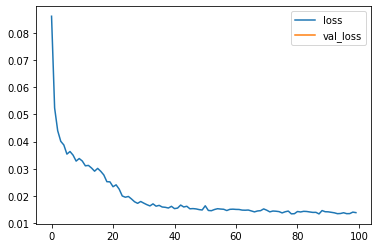

In [181]:
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=False, callbacks=[plot_losses])

In [178]:
predictions = model.predict(x_train).tolist()
for i, prediction in enumerate(predictions):
    print('model:\t', np.round(prediction,3))
    print('label:\t', y_train[i])
    print(' ')

4/4 [==============================] - 0s 1ms/step
model:	 [ 0.    -0.     0.     0.     0.    -0.075  0.137  0.115  0.056]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.    -0.092  0.115  0.153  0.047]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.    -0.117  0.132  0.161  0.066]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.    -0.117  0.132  0.161  0.066]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.    -0.101  0.131  0.147  0.063]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.    -0.005  0.141  0.042  0.031]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.     0.125  0.123 -0.062 -0.005]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.     0.149  0.105 -0.07  -0.024]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.     0.     0.     0.     0.134  0.106 -0.056 -0.021]
label:	 [0 0 0 0 0 0 0 0 0]
 
model:	 [ 0.    -0.   

In [68]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [182]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in arduino code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print('// You also have to disable the initial weight randomization')
print('// you can find it under this section in the arduino code:')
print('//* Initialize HiddenWeights and ChangeHiddenWeights ')
print('\n')
print(to_str('HiddenWeights', W1))
print('\n')
print(to_str('OutputWeights', W2))

// replace these two lines in arduino code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


// You also have to disable the initial weight randomization
// you can find it under this section in the arduino code:
//* Initialize HiddenWeights and ChangeHiddenWeights 


float HiddenWeights[10][10] = {{0.2372424304485321, -0.04173107445240021, 0.10782608389854431, 1.2396361827850342, -0.10749471187591553, -0.5013482570648193, -0.7476458549499512, 1.1017314195632935, 0.39326512813568115, -1.7640278339385986}, {0.7175414562225342, -0.5605186223983765, -0.3781200349330902, -1.2166167497634888, -0.4530803859233856, 0.03383808210492134, -0.11919645965099335, -0.7489916086196899, 0.1216551885008812, -0.35555630922317505}, {-0.47189411520957947, -0.324931800365448, -0.6123314499855042, 0.7144972085952759, -0.40516066551208496, 0.4502118229866028, -0.27037304639816284, -0.6976190209388733, 0.40748584270477295, -0